In [1]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)


In [2]:
X_train = X_train /255
X_test = X_test / 255


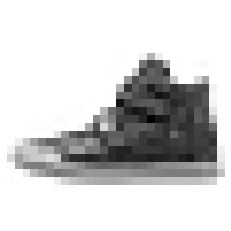

In [3]:
import matplotlib.pyplot as plt 
plt.imshow(X_train[142], cmap="binary")
plt.axis('off')
plt.show()


In [4]:
class_names = ["koszulka", "spodnie", "pulower", "sukienka", "kurtka", "sandał", "koszula", "but", "torba", "kozak"]
class_names[y_train[142]]

'but'

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


2022-05-26 15:50:07.166821: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-26 15:50:07.166910: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


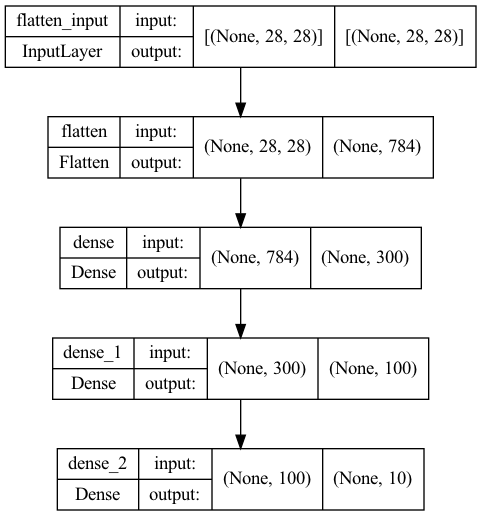

In [5]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()
tf.keras.utils.plot_model(model, "fashion_mnist.png", show_shapes=True)


In [6]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [7]:
import os

root_logdir = os.path.join(os.curdir, "image_logs")

def get_run_logdir():
    
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)




In [8]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1,callbacks=[tensorboard_cb])

Epoch 1/20


2022-05-26 15:50:07.516955: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-26 15:50:07.628825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1686/1688 [============================>.] - ETA: 0s - loss: 0.7216 - accuracy: 0.7624

2022-05-26 15:50:14.715623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 8s 4ms/step - loss: 0.7216 - accuracy: 0.7624 - val_loss: 0.5373 - val_accuracy: 0.8157
Epoch 2/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4847 - accuracy: 0.8328 - val_loss: 0.4899 - val_accuracy: 0.8188
Epoch 3/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4381 - accuracy: 0.8460 - val_loss: 0.4343 - val_accuracy: 0.8422
Epoch 4/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4114 - accuracy: 0.8555 - val_loss: 0.4515 - val_accuracy: 0.8325
Epoch 5/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3916 - accuracy: 0.8625 - val_loss: 0.3901 - val_accuracy: 0.8578
Epoch 6/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3762 - accuracy: 0.8676 - val_loss: 0.3837 - val_accuracy: 0.8617
Epoch 7/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3638 - accuracy: 0.8713 - val_loss: 0.3737 - val_accuracy: 0.8638
Epo

Prediction: koszulka
Confidence: 0.9936272
Truth: koszulka


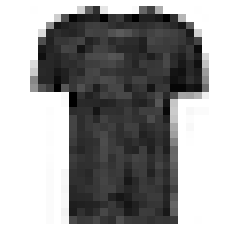

In [12]:
import numpy as np

image_index = np.random.randint(len(X_test))
image = np.array([X_test[image_index]])
confidences = model.predict(image)
confidence = np.max(confidences[0])
prediction = np.argmax(confidences[0])
print("Prediction:", class_names[prediction])
print("Confidence:", confidence)
print("Truth:", class_names[y_test[image_index]])
plt.imshow(image[0], cmap="binary")
plt.axis('off')
plt.show()

In [15]:
#%load_ext tensorboard
#%tensorboard --logdir ./image_logs


In [16]:
model.save('fashion_clf.h5')

In [1]:
# regression

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler


housing = fetch_california_housing()

In [2]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full, random_state=42)

In [3]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

11610
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


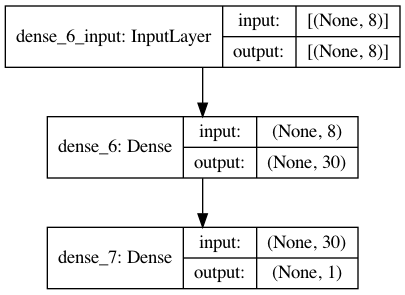

In [20]:
print(len(X_train))

model2 = keras.models.Sequential()

model2.add(keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]))
model2.add(keras.layers.Dense(1))  # without activation function


model2.summary()
tf.keras.utils.plot_model(model2, "californiaHousing.png", show_shapes=True)

# 100 epochs initially




In [21]:
model2.compile(loss="mse",optimizer="sgd",metrics=["accuracy"])

In [22]:
es = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.01,verbose=1)


import os

root_logdir = os.path.join(os.curdir, "housing_logs")

def get_run_logdir2():
    
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir2 = get_run_logdir2()
tensorboard_cb2 = tf.keras.callbacks.TensorBoard(run_logdir2)





In [23]:
history2 = model2.fit(X_train, y_train, epochs=100, validation_data=(X_valid,y_valid),callbacks=[tensorboard_cb2,es])

model2.save('reg_housing_1.h5')

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.7339 - accuracy: 0.0028 - val_loss: 8.5745 - val_accuracy: 0.0044
Epoch 2/100
363/363 [==============================] - 0s 812us/step - loss: 0.4745 - accuracy: 0.0029 - val_loss: 9.6611 - val_accuracy: 0.0044
Epoch 3/100
363/363 [==============================] - 0s 823us/step - loss: 0.5079 - accuracy: 0.0029 - val_loss: 1.1080 - val_accuracy: 0.0044
Epoch 4/100
363/363 [==============================] - 0s 674us/step - loss: 0.4219 - accuracy: 0.0029 - val_loss: 0.4406 - val_accuracy: 0.0044
Epoch 5/100
363/363 [==============================] - 0s 847us/step - loss: 0.4046 - accuracy: 0.0029 - val_loss: 0.4827 - val_accuracy: 0.0044
Epoch 6/100
363/363 [==============================] - 0s 676us/step - loss: 0.3985 - accuracy: 0.0029 - val_loss: 0.4381 - val_accuracy: 0.0044
Epoch 7/100
363/363 [==============================] - 0s 714us/step - loss: 0.3933 - accuracy: 0.0029 - val_loss: 0.4417 - val_accu

In [25]:
#%load_ext tensorboard
#%tensorboard --logdir ./housing_logs

In [54]:
    
    
model3 = keras.models.Sequential()

model3.add(keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]))
model3.add(keras.layers.Dense(40,activation="relu"))
model3.add(keras.layers.Dense(1))  # without activation function


model3.summary()
tf.keras.utils.plot_model(model3, "californiaHousing.png", show_shapes=True)

# 100 epochs initially


model3.compile(loss="mse",optimizer="sgd",metrics=["accuracy"])



es = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.01,verbose=1)


import os

root_logdir = os.path.join(os.curdir, "housing_logs","housing2_logs")

def get_run_logdir3():
    
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir3 = get_run_logdir3()
tensorboard_cb3 = tf.keras.callbacks.TensorBoard(run_logdir3)



model3.compile(loss="mse",optimizer="sgd",metrics=["accuracy"])


history3 = model3.fit(X_train, y_train, epochs=100, validation_data=(X_valid,y_valid),callbacks=[tensorboard_cb3,es])

model3.save('reg_housing_2.h5')

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 30)                270       
_________________________________________________________________
dense_95 (Dense)             (None, 40)                1240      
_________________________________________________________________
dense_96 (Dense)             (None, 1)                 41        
Total params: 1,551
Trainable params: 1,551
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.7670 - accuracy: 0.0028 - val_loss: 5.8847 - val_accuracy: 0.0044
Epoch 2/100
363/363 [==============================] - 0s 879us/step - loss: 0.4919 - accuracy: 0.0029 - val_loss: 8.3413 - val_accuracy: 0.0044
Epoch 3/100
363/363 [==============================] - 0s 709us/step - loss: 0.4440 - accurac

In [53]:
model4= keras.models.Sequential()

model4.add(keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]))
model4.add(keras.layers.Dense(100,activation="relu"))
model4.add(keras.layers.Dense(120,activation="relu"))
model4.add(keras.layers.Dense(30,activation="relu"))
model4.add(keras.layers.Dense(1))  # without activation function


model4.summary()
tf.keras.utils.plot_model(model4, "californiaHousing.png", show_shapes=True)

# 100 epochs initially


model4.compile(loss="mse",optimizer=tf.keras.optimizers.SGD(),metrics=["accuracy"])



es = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.01,verbose=1)


import os

root_logdir = os.path.join(os.curdir, "housing_logs","housing3_logs")

def get_run_logdir4():
    
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir4 = get_run_logdir4()
tensorboard_cb4 = tf.keras.callbacks.TensorBoard(run_logdir4)



model4.compile(loss="mse",optimizer="sgd",metrics=["accuracy"])


history4 = model4.fit(X_train, y_train, epochs=100, validation_data=(X_valid,y_valid),callbacks=[tensorboard_cb4,es])

model4.save('reg_housing_3.h5')

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 30)                270       
_________________________________________________________________
dense_90 (Dense)             (None, 100)               3100      
_________________________________________________________________
dense_91 (Dense)             (None, 120)               12120     
_________________________________________________________________
dense_92 (Dense)             (None, 30)                3630      
_________________________________________________________________
dense_93 (Dense)             (None, 1)                 31        
Total params: 19,151
Trainable params: 19,151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7756 - accuracy: 0.0029 - val_loss: 1.

162/162 [==============================] - 0s 784us/step - loss: 0.3003 - accuracy: 0.0021


[0.30025815963745117, 0.0021317829377949238]